插值思路:均值/中位数/众数/临近值/(拉格朗日)插值法...

In [43]:
import numpy as np
import pandas as pd
from numpy import nan as NA

'''
fillna函数参数
value           标量值或字典型对象用于填充缺失值
method          插值方法,如果没有其他参数,默认是'ffill'
    method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
        Method to use for filling holes in reindexed Series pad / ffill: propagate last 
        valid observation forward to next valid backfill / bfill: use NEXT valid observation to fill gap
axis            需要填充的轴,默认是axis=0
inplace         修改被调用的对象,而不是生成一个备份
limit           用于前向或后向填充时最大的填充范围
'''
df = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,A,B,C
0,-0.120771,NaN,NaN
1,1.017559,NaN,NaN
2,0.135651,NaN,0.156197
3,-0.280455,NaN,-1.630603
4,-1.359951,0.471964,0.289900
5,0.196376,1.515674,0.469255
6,1.045975,-0.275434,0.733941


In [44]:
df.fillna(0)  # 用0代替缺失值NA

,A,B,C
0,-0.120771,0.000000,0.000000
1,1.017559,0.000000,0.000000
2,0.135651,0.000000,0.156197
3,-0.280455,0.000000,-1.630603
4,-1.359951,0.471964,0.289900
5,0.196376,1.515674,0.469255
6,1.045975,-0.275434,0.733941


In [45]:
df.fillna(method='bfill')

,A,B,C
0,-0.120771,0.471964,0.156197
1,1.017559,0.471964,0.156197
2,0.135651,0.471964,0.156197
3,-0.280455,0.471964,-1.630603
4,-1.359951,0.471964,0.289900
5,0.196376,1.515674,0.469255
6,1.045975,-0.275434,0.733941


In [46]:
df.fillna(value={'B': 0.5, 'C': 0})  # 不同的列用不同的填充值进行填充

,A,B,C
0,-0.120771,0.500000,0.000000
1,1.017559,0.500000,0.000000
2,0.135651,0.500000,0.156197
3,-0.280455,0.500000,-1.630603
4,-1.359951,0.471964,0.289900
5,0.196376,1.515674,0.469255
6,1.045975,-0.275434,0.733941


In [47]:
df.fillna(0, inplace=True)  # df发生变化
df

,A,B,C
0,-0.120771,0.000000,0.000000
1,1.017559,0.000000,0.000000
2,0.135651,0.000000,0.156197
3,-0.280455,0.000000,-1.630603
4,-1.359951,0.471964,0.289900
5,0.196376,1.515674,0.469255
6,1.045975,-0.275434,0.733941


In [48]:
df1 = pd.DataFrame(np.random.randn(6, 3))
df1.iloc[2:, 1] = NA
df1.iloc[4:, 2] = NA
df1

,0,1,2
0,1.511372,-0.360501,-0.892798
1,1.254188,1.526501,0.164033
2,0.822291,NaN,-1.493377
3,0.114120,NaN,0.326622
4,0.101121,NaN,NaN
5,-0.220742,NaN,NaN


In [49]:
df1.fillna(method='ffill')

,0,1,2
0,1.511372,-0.360501,-0.892798
1,1.254188,1.526501,0.164033
2,0.822291,1.526501,-1.493377
3,0.114120,1.526501,0.326622
4,0.101121,1.526501,0.326622
5,-0.220742,1.526501,0.326622


In [50]:
df1.fillna(method='ffill', limit=2)

,0,1,2
0,1.511372,-0.360501,-0.892798
1,1.254188,1.526501,0.164033
2,0.822291,1.526501,-1.493377
3,0.114120,1.526501,0.326622
4,0.101121,NaN,0.326622
5,-0.220742,NaN,0.326622


In [51]:
# 举例
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.interpolate import lagrange
import copy

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

data = pd.Series(np.random.rand(100) * 100)
data.loc[3, 6, 33, 56, 45, 66, 80, 90] = np.nan

In [52]:
data_m = data.fillna(data.median())  # 中位数填充缺失值
data_m

0     93.954704
1     44.714642
2     56.996317
3     40.635885
4     87.711073
        ...    
95    39.886235
96    62.844092
97    61.277118
98    28.430019
99    59.591877
Length: 100, dtype: float64

In [53]:
data_la = copy.deepcopy(data)


def La(s, n, k=5):
    y = s.reindex(list(range(n - k, n + 1 + k)))
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)


for i in range(len(data)):
    if data_la.isnull()[i]:
        data_la.iloc[i] = La(data, i)
        print('在', i, '个位置填充缺失值', La(data_la, i))

data_la.dropna(inplace=True)
data_la

在 3 个位置填充缺失值 102.3365997166762
在 6 个位置填充缺失值 -2.0735255674899236
在 33 个位置填充缺失值 106.9920883178711
在 45 个位置填充缺失值 16.8876953125
在 56 个位置填充缺失值 1.09765625
在 66 个位置填充缺失值 393.25
在 80 个位置填充缺失值 -2086.0
在 90 个位置填充缺失值 -4640.0


0      93.954704
1      44.714642
2      56.996317
3     102.336600
4      87.711073
         ...    
95     39.886235
96     62.844092
97     61.277118
98     28.430019
99     59.591877
Length: 100, dtype: float64

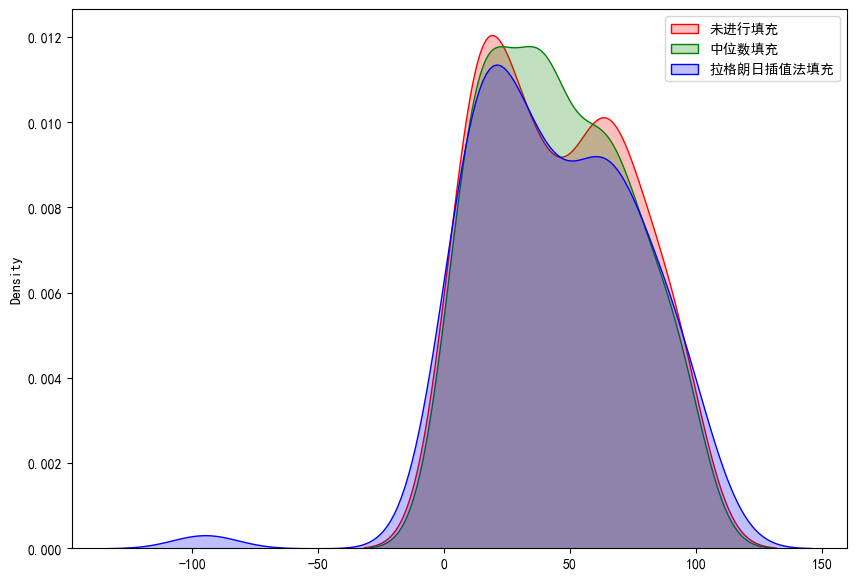

In [54]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
sns.kdeplot(data, shade=True, color="r", label='未进行填充')
sns.kdeplot(data_m, shade=True, color="g", label='中位数填充')
sns.kdeplot(data_la, shade=True, color='b', label='拉格朗日插值法填充')
ax.legend()